In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [197]:
path="/Users/vishakha.sharma/Downloads/ex1data1.txt"
ex1= pd.read_csv(path, header= None)
ex1

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [198]:
headers= ["Population of City","Profit"]
ex1.columns= headers
ex1

,Population of City,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [199]:
m= len(ex1)
m

97

In [201]:
Y= np.array(ex1["Profit"]).reshape(1,m)
Y.shape

(1, 97)

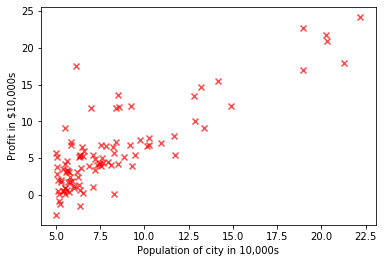

In [147]:
x= ex1["Population of City"]
y= ex1["Profit"]
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.scatter(x,y, color="red", marker="x", linewidths=10, alpha=0.7)


In [229]:
theta= np.zeros(shape=(1,2)) #1x2
X= np.ones(shape=(2,m)) #2xm
X[1]= ex1["Population of City"] 
iterations= 1500
alpha= 0.01

In [203]:
theta

array([[0., 0.]])

In [204]:
theta.shape

(1, 2)

In [205]:
X.shape

(2, 97)

In [230]:
def computeCost(X, ypred, theta, m):
    ypred= np.dot(theta, X)
    diff= ypred- Y
    cost= (np.sum(np.square(diff)))/(2*m)
    return cost


Computing cost

In [231]:
computeCost(X,Y,theta,m)

32.072733877455676

Estimating optimal parameters theta using gradient descent

In [232]:
def gradientDescent(X, Y, theta, m, alpha, iterations):
    for i in range(iterations):
        temp= np.dot(theta, X) - Y #1x97
        theta= theta - (alpha/m)* np.dot(temp, X.T)
    return theta

In [233]:
ntheta= gradientDescent(X, Y, theta, m, alpha, iterations)
ntheta

array([[-3.63029144,  1.16636235]])

In [259]:
#New Cost with least error
cost=computeCost(X,Y,ntheta, m)
cost

4.483388256587726

So, the optimum linear regression model is Profit= -3.63 + 1.66*PopulationOfCity

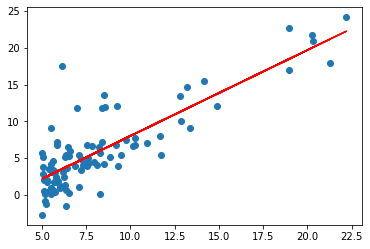

In [258]:
#Plot
plt.scatter(X[1,:],Y)
plotY= np.dot(ntheta, X)
plt.plot(X[1,:], plotY[0,:], color='red')

Same plot using sklearn linear regression 

In [58]:
X2 = ex1.iloc[:, 0].values.reshape(-1, 1)  
Y2 = ex1.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X2, Y2)  #linear regression
Y_pred = linear_regressor.predict(X2)  

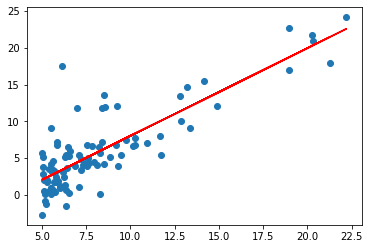

In [59]:
plt.scatter(X2, Y2)
plt.plot(X2, Y_pred, color='red')
plt.show()